## Disponível online

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/mntf/trabalho3-pt3.ipynb)

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/mntf/trabalho3-pt3](https://github.com/carlos-adir/UnB-Courses/blob/main/mntf/trabalho3-pt3.ipynb)

In [1]:
try:
    import numpy as np
    from tqdm import tqdm
    from matplotlib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install numpy")
    os.system("pip install tqdm")
    os.system("pip install matplotlib")
    import numpy as np
    import tqdm
    from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from typing import List, Tuple, Callable, Optional
import warnings
from helper import solve_system, plot_field
warnings.filterwarnings("error")
np.set_printoptions(precision=3)

# Equação do Calor 2D (Permanente)

### Exercício 12

Equação do calor bidimensional em regime permanente (Equação de Laplace):
> $$\dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2} = 0$$ 
>
> No domínio
> 
> $$\Omega = \left(0, \ 1\right) \times \left(0, \ 1\right)$$
>
> E condições de contorno
>
> $$\begin{align*} T(x, \ 0) & = 0 \ \ \ \ \ 0 \le x \le 1 \\ T(x, \ 1) & = 1 \ \ \ \ \ 0 \le x \le 1 \\ T(0, \ y) & = 0 \ \ \ \ \ 0 < y < 1 \\ T(1, \ y) & = 0 \ \ \ \ \ 0 < y < 1 \end{align*}$$

In [2]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
nx, ny = 10, 51
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
T = np.empty((nx, ny))
T.fill(np.nan)
K = np.zeros((nx, nx, ny, ny))
F = np.zeros((nx, ny), dtype="float64")
stencil = np.array([[0, dy/dx, 0],
                    [dx/dy, -2*(dy/dx+dx/dy), dx/dy],
                    [0, dy/dx, 0]], dtype="float64")
T[0, :] = 0  # T(0, y) = 0
T[nx-1, :] = 0  # T(1, y) = 0
T[:, 0] = 0  # T(x, 0) = 0
T[:, ny-1] = 1  # T(x, 1) = 1

for i in range(1, nx-1):
    for j in range(1, ny-1):
        K[i, i-1:i+2, j, j-1:j+2] = stencil[:, :]

T, F = solve_system(K, F, T)

Text(0.5, 0.98, 'Numerical solution $T_{num}$ at final time')

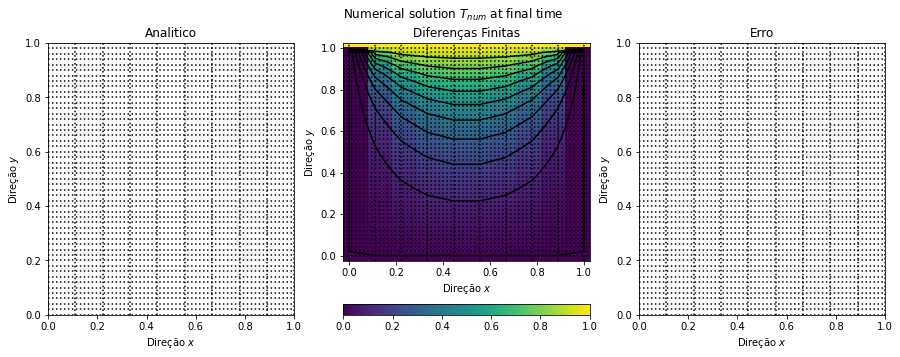

In [3]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
# plot_field(xmesh, ymesh, Tanalitic, axis[0])
plot_field(xmesh, ymesh, T, axis[1])
# plot_field(xmesh, ymesh, np.abs(T[-1]-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Direção $y$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]
    [axis[i].axhline(y=yj, ls="dotted", color="k") for yj in ymesh]
fig.suptitle(r"Numerical solution $T_{num}$ at final time")

In [4]:
del xmesh
del ymesh
del T
del F
del K

### Exercicio 13

Equação do calor bidimensional em regime permanente com geração de calor:
> $$\dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2} = -2\pi^2 \sin \left(\pi x\right) \sin \left(\pi y\right)$$ 
>
> No domínio
> 
> $$\Omega = \left(0, \ 1\right) \times \left(0, \ 1\right)$$
>
> E condições de contorno
>
> $$\begin{align*} T(x, \ 0) & = 0 \ \ \ \ \ 0 \le x \le 1 \\ T(x, \ 1) & = 0 \ \ \ \ \ 0 \le x \le 1 \\ T(0, \ y) & = 0 \ \ \ \ \ 0 < y < 1 \\ T(1, \ y) & = 0 \ \ \ \ \ 0 < y < 1 \end{align*}$$

In [5]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
nx, ny = 21, 31
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
T = np.empty((nx, ny))
T.fill(np.nan)
K = np.zeros((nx, nx, ny, ny))
F = np.zeros((nx, ny), dtype="float64")
stencil = np.array([[0, dy/dx, 0],
                    [dx/dy, -2*(dy/dx+dx/dy), dx/dy],
                    [0, dy/dx, 0]], dtype="float64")
T[0, :] = 0  # T(0, y) = 0
T[nx-1, :] = 0  # T(1, y) = 0
T[:, 0] = 0  # T(x, 0) = 0
T[:, ny-1] = 0  # T(x, 1) = 0

for i in range(1, nx-1):
    for j in range(1, ny-1):
        K[i, i-1:i+2, j, j-1:j+2] = stencil[:, :]
sinpix = np.sin(np.pi*xmesh)
sinpiy = np.sin(np.pi*ymesh)
F = np.tensordot(sinpix, sinpiy, axes=0)
F *= -2*np.pi**2 *dy*dx
T, F = solve_system(K, F, T)

In [6]:
Tanalitic = np.tensordot(sinpix, sinpiy, axes=0)

Text(0.5, 0.98, 'Numerical solution $T_{num}$ at final time')

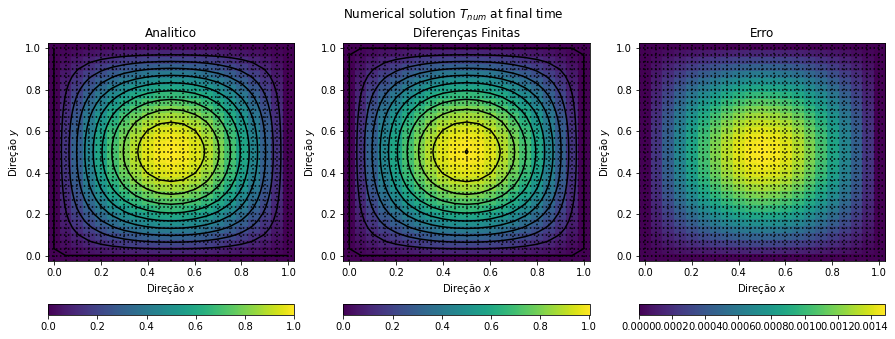

In [7]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, ymesh, Tanalitic, axis[0])
plot_field(xmesh, ymesh, T, axis[1])
plot_field(xmesh, ymesh, np.abs(T-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Direção $y$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]
    [axis[i].axhline(y=yj, ls="dotted", color="k") for yj in ymesh]
fig.suptitle(r"Numerical solution $T_{num}$ at final time")

In [8]:
del xmesh
del ymesh
del T
del F
del K

# Diferentes formulações: Explicito, Implicito e Crank-Nicolson

### Exercício 14

> Resolva novamente o problema proposto no exercício 3, mas agora com o Método BTCS.
> 
> $$\dfrac{T_{k+1,i}-T_{k,i}}{h_t} = \dfrac{T_{k+1,i-1}-2T_{k+1,i}+T_{k+1,i+1}}{h_x^2}$$
> 
> e depois com o método de Crank-Nicolson:
> 
> $$\dfrac{T_{k+1,i}-T_{k,i}}{h_t} = \dfrac{1}{2}\left(\dfrac{T_{k,i-1}-2T_{k,i}+T_{k,i+1}}{h_x^2} + \dfrac{T_{k+1,i-1}-2T_{k+1,i}+T_{k+1,i+1}}{h_x^2}\right)$$
>
> Compare os resultados obtidos com os 3 métodos numéricos com a solução analítica.
>
> > **Exercicio 3**
> > $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}$$
> >
> > $$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$
> >
> > $$T(0, \ t) = 1 \ \ \ \ \ \forall 0 \le t$$
> > $$T(1, \ t) = 0 \ \ \ \ \ \forall 0 \le t$$
> > $$T(x, \ 0) = 0 \ \ \ \ 0 < x < 1$$
> > 
> > $$T_{exact}(x, \ t) = 1-x-\sum_{n=1}^{\infty} \dfrac{2}{n\pi} \cdot \exp \left(-n^2\pi^2 t\right) \cdot \sin \left(n\pi x\right)$$



In [9]:
xmin, xmax = 0, 1
tmin, tmax = 0, 0.3
nx, nt = 21, 238
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

In [10]:
Tanalitic = np.zeros((nt, nx), dtype="float64")
for n in range(1, 21):
    exppart = np.exp(-n**2*(np.pi**2)*tmesh)
    sinpart = np.sin(n*np.pi*xmesh)
    Tanalitic -= np.tensordot(exppart, sinpart, axes=0)/n
Tanalitic *= 2/np.pi
for i, xi in enumerate(xmesh):
    Tanalitic[:, i] += 1-xi

In [11]:
Texplicit = np.zeros((nt, nx), dtype="float64")
Texplicit[:, 0] = 1
a = dt/dx**2
for k in tqdm(range(nt-1)):  # Aqui ja usamos a compactacao de vetor
    Texplicit[k+1, 1:-1] = (1-2*a)*Texplicit[k, 1:-1]
    Texplicit[k+1, 1:-1] += a * Texplicit[k, 0:-2]
    Texplicit[k+1, 1:-1] += a * Texplicit[k, 2:]

100%|██████████| 237/237 [00:00<00:00, 23864.46it/s]


Para o método implícito BTCS, teremos

> $$\dfrac{{\color{red}{T_{k+1,i}}}-T_{k,i}}{h_t} = \dfrac{{\color{red}{T_{k+1,i-1}}}-2{\color{red}{T_{k+1,i}}}+{\color{red}{T_{k+1,i+1}}}}{h_x^2}$$
> 
> Que não conhecemos os valores em vermelho, de forma que podemos montar:
> 
> $$\begin{bmatrix} \dfrac{-1}{h_x^2}& \left(\dfrac{2}{h_x^2} + \dfrac{1}{h_t}\right) & \dfrac{-1}{h_x^2} \end{bmatrix}\begin{bmatrix} {\color{red}{T_{k+1,i-1}}} \\ {\color{red}{T_{k+1,i}}} \\ {\color{red}{T_{k+1,i+1}}} \\ \end{bmatrix} = \dfrac{T_{k,i}}{h_t}$$
> 
> Sendo essa equação válida para qualquer $i = 1, \ 2, \ \cdots, \ n_x - 2$, e adicionando a condição de contorno então temos o sistema linear:
> $$\left[\begin{smallmatrix} 1 & & & & \cdots & & \\ \frac{-1}{h_x^2}& \left(\frac{2}{h_x^2} + \frac{1}{h_t}\right) & \frac{-1}{h_x^2} & & \cdots & & \\ & \frac{-1}{h_x^2}& \left(\frac{2}{h_x^2} + \frac{1}{h_t}\right) & \frac{-1}{h_x^2} & \cdots & & \\ \vdots & \vdots & \ddots & \ddots & \ddots & \vdots & \vdots  \\ & & \cdots & \frac{-1}{h_x^2} & \left(\frac{2}{h_x^2} + \frac{1}{h_t}\right) & \frac{-1}{h_x^2} &  \\ & & \cdots & & \frac{-1}{h_x^2} & \left(\frac{2}{h_x^2} + \frac{1}{h_t}\right) & \frac{-1}{h_x^2} \\ & & \cdots & & & & 1 \end{smallmatrix}\right] \begin{bmatrix} T_{k+1,0} \\ T_{k+1,1} \\ T_{k+1,2} \\ \vdots \\ T_{k+1,n-3} \\ T_{k+1, n-2} \\ T_{k+1,n-1} \end{bmatrix} = \begin{bmatrix} T_a \\ \frac{T_{k,1}}{h_t} \\ \frac{T_{k,2}}{h_t} \\ \vdots \\ \frac{T_{k,n-3}}{h_t} \\ \frac{T_{k,n-2}}{h_t} \\ T_b \end{bmatrix}$$
> 
> Que podemos reescrever, com $a=\frac{1}{2+\frac{h_x^2}{h_t}}$ e $b = \frac{1}{1+\frac{2h_t}{h_x^2}}$:
> 
> $$\begin{bmatrix} 1 & -a & & \cdots & \\ -a & 1 & -a & \cdots & \\ \vdots & \ddots & \ddots & \ddots & \vdots \\  & \cdots & -a & 1 & -a  \\ & \cdots & & -a & 1 \\ \end{bmatrix} \begin{bmatrix} T_{k+1,0} \\ T_{k+1,1} \\ \vdots \\ T_{k+1,n-3} \\ T_{k+1, n-2} \end{bmatrix} = b \cdot \begin{bmatrix} T_{k,1} \\ T_{k,2} \\ \vdots \\ T_{k,n-3} \\ T_{k,n-2} \end{bmatrix} + a \cdot \begin{bmatrix}T_a \\ 0 \\ \vdots \\ 0 \\ T_b \end{bmatrix}$$
> 
> Tal sistema é tridiagonal, simétrico e e é facil de ser resolvido utilizando um método direto de eliminação gaussiana:
> $$\begin{bmatrix} \square & \circ & \cdots & & \\ \circ & \square  & \cdots & & \\ \vdots &  \vdots & \ddots & \vdots & \vdots \\ & & \cdots & \square & \circ \\ & & \cdots & \circ & \square \end{bmatrix} \Rightarrow \begin{bmatrix} \square & \circ & \cdots & & \\   & \square  & \cdots & & \\ \vdots &  \vdots & \ddots & \vdots & \vdots \\ & & \cdots & \square & \circ \\ & & \cdots &   & \square \end{bmatrix} \Rightarrow \begin{bmatrix} \square &   & \cdots & & \\ & \square  & \cdots & & \\ \vdots &  \vdots & \ddots & \vdots & \vdots \\ & & \cdots & \square &   \\ & & \cdots &   & \square \end{bmatrix}$$

In [12]:
Timplicit = np.zeros((nt, nx), dtype="float64")
Timplicit[:, 0] = 1
a = 1/(2+dx**2/dt)
b = 1/(1+2*dt/dx**2)
diagonalvec = np.ones(nx)
for k in tqdm(range(nt-1)):  
    diagonalvec[:] = 1
    Timplicit[k+1, 1:-1] = b*Timplicit[k, 1:-1]
    Timplicit[k+1, 1] += a*Timplicit[k+1, 0]
    Timplicit[k+1, -2] += a*Timplicit[k+1, -1]
    # Aqui usamos uma eliminação gaussiana
    for i in range(2, nx-1): # Eliminacao da triangular inferior 
        diagonalvec[i] -= a**2 / diagonalvec[i-1]
        Timplicit[k+1, i] += a*Timplicit[k+1, i-1]/diagonalvec[i-1]
    Timplicit[k+1, -2] /= diagonalvec[-2]
    for i in range(nx-3, 0, -1): # Eliminacao da triangular superior
        Timplicit[k+1, i] += a*Timplicit[k+1, i+1]
        Timplicit[k+1, i] /= diagonalvec[i]

100%|██████████| 237/237 [00:00<00:00, 7017.70it/s]


Para o método misto de Crank-Nicolson, teremos

> $$\begin{bmatrix} \dfrac{-1}{2h_x^2}& \left(\dfrac{1}{h_t}+\dfrac{1}{h_x^2}\right) & \dfrac{-1}{2h_x^2} \end{bmatrix}\begin{bmatrix} {\color{red}{T_{k+1,i-1}}} \\ {\color{red}{T_{k+1,i}}} \\ {\color{red}{T_{k+1,i+1}}} \\ \end{bmatrix} = \begin{bmatrix} \dfrac{1}{2h_x^2}& \left(\dfrac{1}{h_t} - \dfrac{1}{h_x^2}\right) & \dfrac{1}{2h_x^2} \end{bmatrix}\begin{bmatrix} T_{k,i-1} \\ T_{k,i} \\ T_{k,i+1} \\ \end{bmatrix} $$
> 
> Sendo essa equação válida para qualquer $i = 1, \ 2, \ \cdots, \ n_x - 2$, adicionando a condição de contorno, e reduzindo o sistema linear teremos:
> 
> $$\left[\begin{smallmatrix} 1 & -a & & \\ -a & 1 & -a & \\ &  \ddots & \ddots & \ddots  &  \\ & & -a & 1 & -a  \\ & & & -a & 1 \end{smallmatrix}\right] \left[\begin{smallmatrix} T_{k+1,1} \\ T_{k+1,2} \\ \vdots \\ T_{k+1,n-3} \\ T_{k+1, n-2} \end{smallmatrix}\right] = \left[\begin{smallmatrix} a & b & a  & & & \\ & a & b & a  & & \\ & & \ddots & \ddots & \ddots  & & \\  & & & a & b & a  &  \\ & & & & a & b & a  \end{smallmatrix}\right] \left[\begin{smallmatrix} T_{k,0} \\ T_{k,1} \\ \vdots \\ T_{k,n-2} \\ T_{k, n-1} \end{smallmatrix}\right] + a\left[\begin{smallmatrix} T_{a} \\ 0 \\ \vdots \\ 0 \\ T_b \end{smallmatrix}\right]$$
> 
> Com 
> 
> $$a = \dfrac{\left(\dfrac{1}{2h_x^2}\right)}{\left(\dfrac{1}{h_t}+\dfrac{1}{h_x^2}\right)} = \dfrac{h_t}{2(h_t+h_x^2)}; \ \ \ \ \ \ \ \ \ b =\dfrac{\left(\dfrac{1}{h_t}-\dfrac{1}{h_x^2}\right)}{\left(\dfrac{1}{h_t}+\dfrac{1}{h_x^2}\right)} = \dfrac{h_x^2 - h_t}{h_x^2 + h_t}$$
> 
> Tal sistema se resolve igual ao sistema do esquema implícito BTCS, pois é tridiagonal

In [13]:
Tcranknico = np.zeros((nt, nx), dtype="float64")
Tcranknico[:, 0] = 1
a = dt/(2*(dt+dx**2))
b = (dx**2-dt)/(dx**2+dt)
diagonalvec = np.ones(nx)
for k in tqdm(range(nt-1)):
    diagonalvec[:] = 1
    Tcranknico[k+1, 1:-1] = a*Tcranknico[k, :-2]
    Tcranknico[k+1, 1:-1] += b*Tcranknico[k, 1:-1]
    Tcranknico[k+1, 1:-1] += a*Tcranknico[k, 2:]
    Tcranknico[k+1, 1] += a*Tcranknico[k+1, 0]
    Tcranknico[k+1, -2] += a*Tcranknico[k+1, -1]
    for i in range(2, nx-1):
        diagonalvec[i] -= a**2 / diagonalvec[i-1]
        Tcranknico[k+1, i] += a*Tcranknico[k+1, i-1]/diagonalvec[i-1]
    Tcranknico[k+1, -2] /= diagonalvec[-2]
    for i in range(nx-3, 0, -1):
        Tcranknico[k+1, i] += a*Tcranknico[k+1, i+1]
        Tcranknico[k+1, i] /= diagonalvec[i]

100%|██████████| 237/237 [00:00<00:00, 5680.90it/s]


Text(0.5, 0.98, 'Valor da solução numerica $T_{num}$')

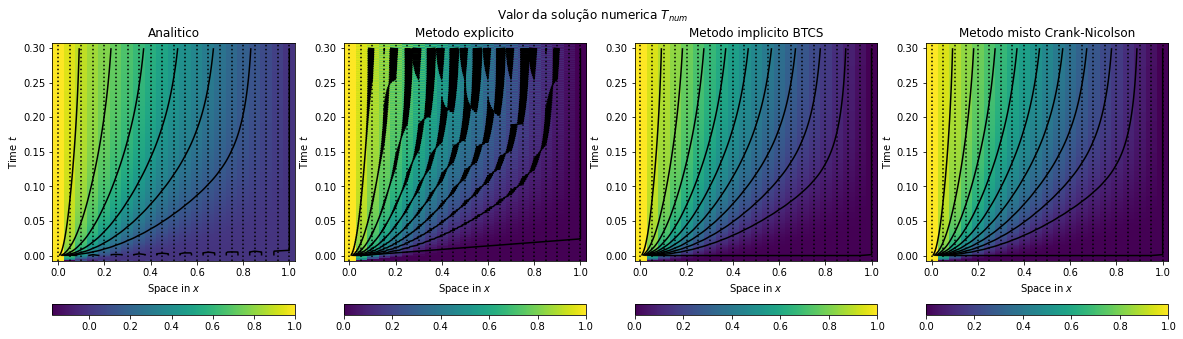

In [14]:
fig, axis = plt.subplots(1, 4, figsize=(20, 5))
plot_field(xmesh, tmesh, Tanalitic.T, axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[0].set_title("Analitico")
axis[0].set_xlabel("Space in $x$")
axis[0].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, Texplicit.T, axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[1].set_title("Metodo explicito")
axis[1].set_xlabel("Space in $x$")
axis[1].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, Timplicit.T, axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[2].set_title("Metodo implicito BTCS")
axis[2].set_xlabel("Space in $x$")
axis[2].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, Tcranknico.T, axis[3])
[axis[3].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[3].set_title("Metodo misto Crank-Nicolson")
axis[3].set_xlabel("Space in $x$")
axis[3].set_ylabel("Time $t$")
plt.suptitle(r"Valor da solução numerica $T_{num}$")

Text(0.5, 0.98, 'Erro da solução numerica $|T_{num}-T_{ana}|$')

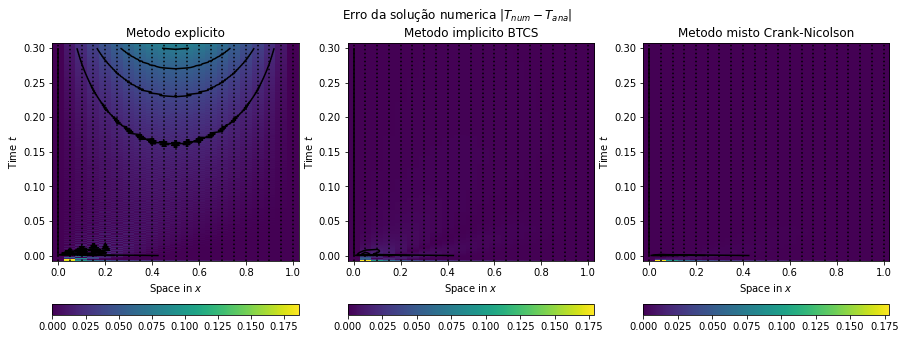

In [15]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, tmesh, np.abs(Texplicit-Tanalitic).T, axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[0].set_title("Metodo explicito")
axis[0].set_xlabel("Space in $x$")
axis[0].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, np.abs(Timplicit-Tanalitic).T, axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[1].set_title("Metodo implicito BTCS")
axis[1].set_xlabel("Space in $x$")
axis[1].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, np.abs(Tcranknico-Tanalitic).T, axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[2].set_title("Metodo misto Crank-Nicolson")
axis[2].set_xlabel("Space in $x$")
axis[2].set_ylabel("Time $t$")
plt.suptitle(r"Erro da solução numerica $|T_{num}-T_{ana}|$")

In [16]:
del xmesh
del tmesh
del Texplicit
del Timplicit
del Tcranknico
del Tanalitic

### Exercício 15

> Resolva novamente o problema proposta no exercício 5, mas agora com os métodos BTCS e Crank-Nicolson. Compare as soluções
> > **Exercicio 5**
> > $$\dfrac{\partial T}{\partial t} = 0.01\cdot \dfrac{\partial^2 T}{\partial x^2}$$
> > $$\Omega = \underbrace{\left[0, \ 0.5\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$
> > $$T(0, \ t) = 0 \ \ \ \ \ \forall \ 0 \le t$$
> > $$\left[\dfrac{\partial T}{\partial x}\right]_{x=0.5}= 0 \ \ \ \ \ \forall \ 0 \le t$$
> > $$T(x, \ 0) = 200x \ \ \ \ \ \forall  \ 0 \le x \le 0.5$$
> > $$T_{exact}(x, \ t) = \dfrac{800}{\pi^2}\sum_{n=0}^{\infty} \dfrac{(-1)^{n}}{(2n+1)^2} \cdot \exp \left(-(2n+1)^2\pi^2 \cdot 0.01 \cdot t\right) \cdot \sin \left((2n+1)\pi x\right)$$


Da mesma forma que fizemos na Questão 14, mas agora, para evitar a escrita demasiada de equações e uma generalização a mais, temos a formulação com um parâmetro $\alpha \in \left[0, \ 1\right] \sub \mathbb{R}$:

* Método explícito: $\alpha = 0$
* Método implícito: $\alpha = 1$
* Método misto Crank-Nicolson: $\alpha = 0.5$

> $$\dfrac{T_{k+1,i}-T_{k,i}}{h_t} = \dfrac{1-\alpha}{h_x^2} \left(T_{k,i-1}-2T_{k,i}+T_{k,i+1}\right) + \dfrac{\alpha}{h_x^2}\left(T_{k+1,i-1}-2T_{k+1,i}+T_{k+1,i+1}\right)$$
> 
> $$\begin{bmatrix} \dfrac{-\alpha}{h_x^2}& \left(\dfrac{1}{h_t}+\dfrac{2\alpha}{h_x^2}\right) & \dfrac{-\alpha}{h_x^2} \end{bmatrix}\begin{bmatrix} T_{k+1,i-1} \\ T_{k+1,i} \\ T_{k+1,i+1} \\ \end{bmatrix} = \begin{bmatrix} \dfrac{1-\alpha}{h_x^2}& \left(\dfrac{1}{h_t} - \dfrac{2(1-\alpha)}{h_x^2}\right) & \dfrac{1-\alpha}{h_x^2} \end{bmatrix}\begin{bmatrix} T_{k,i-1} \\ T_{k,i} \\ T_{k,i+1} \\ \end{bmatrix} $$
> 
> Que reescrevendo com parâmetros
> 
> $$a = \dfrac{2h_t}{2\alpha h_t + h_x^2} \ \ \ \ \ \ \ \ b = \dfrac{h_x^2-2(1-\alpha)h_t}{h_x^2 + 2\alpha h_t}$$
> $$\begin{bmatrix} -\alpha a & 1 & -\alpha a \end{bmatrix}\begin{bmatrix} T_{k+1,i-1} \\ T_{k+1,i} \\ T_{k+1,i+1} \\ \end{bmatrix} = \begin{bmatrix} (1-\alpha) a & b & (1-\alpha)a \end{bmatrix}\begin{bmatrix} T_{k,i-1} \\ T_{k,i} \\ T_{k,i+1} \\ \end{bmatrix} $$


Agora, a diferença principal se dá na condição de Neumann em $x=0.5$, que de mesmo modo feito no Exercício 5:

> $$\dfrac{\partial T}{\partial x} = 0 \Rightarrow \dfrac{T_{k,n}-T_{k,n-2}}{2h_x} = 0 \Rightarrow T_{k,n}=T_{k,n-2}$$
> 
> E aplicando para a formulação matricial em $i=n_x-1$ tem-se 
> 
> $$\begin{bmatrix} -2\alpha a & 1 \end{bmatrix}\begin{bmatrix} T_{k+1,n_x-2} \\ T_{k+1,n_x-1} \end{bmatrix} = \begin{bmatrix} 2(1-\alpha) a & b \end{bmatrix}\begin{bmatrix} T_{k,n_x-2} \\ T_{k,n_x-1} \end{bmatrix} $$
 
Então montando o sistema total

$$\left[\begin{smallmatrix} 1 & -\alpha a & & & \\  -\alpha a & 1 & -\alpha a & & \\ & \ddots & \ddots & \ddots & \\ & & -\alpha a & 1 & -\alpha a \\ & & & -2\alpha a & 1 \end{smallmatrix}\right] \left[\begin{smallmatrix} T_{k+1, \ 1} \\ T_{k+1, \ 2} \\ \vdots \\ T_{k+1, \ n_x-2} \\ T_{k+1, \ n_x-1} \end{smallmatrix}\right] = \left[ \begin{smallmatrix} b & (1-\alpha) a & & & \\ (1-\alpha) a & b & (1-\alpha) a & & \\ & \ddots & \ddots & \ddots & & \\ & & (1-\alpha) a & b & (1-\alpha) a \\ & & & 2(1-\alpha) a & b \end{smallmatrix}\right] \left[\begin{smallmatrix} T_{k, \ 1} \\ \vdots \\ T_{k, \ n_x-2} \\ T_{k, \ n_x-1} \end{smallmatrix}\right]+ \left[\begin{smallmatrix} \alpha a T_{k+1,0} + (1-\alpha) a T_{k,0} \\ 0  \\ \vdots \\ 0 \\ 0 \end{smallmatrix}\right]$$

* Para o caso explícito teremos $\alpha = 0$

$$\left[\begin{smallmatrix} T_{k+1, \ 1} \\ T_{k+1, \ 2} \\ \vdots \\ T_{k+1, \ n_x-2} \\ T_{k+1, \ n_x-1} \end{smallmatrix}\right] = \left[ \begin{smallmatrix} b & a & & & \\ a & b &  a & & \\ & \ddots & \ddots & \ddots & & \\ & &  a & b & a \\ & & & 2 a & b \end{smallmatrix}\right] \left[\begin{smallmatrix} T_{k, \ 1} \\ \vdots \\ T_{k, \ n_x-2} \\ T_{k, \ n_x-1} \end{smallmatrix}\right]+ a\left[\begin {smallmatrix} T_{k,0} \\ 0  \\ \vdots \\ 0 \\ 0 \end{smallmatrix}\right] $$

* Para o caso implícito teremos $\alpha = 1$

$$\left[ \begin{smallmatrix}1 & - a & & & \\  - a & 1 & - a & & \\ & \ddots & \ddots & \ddots & \\ & & - a & 1 & - a \\ & & & -2 a & 1 \end{smallmatrix}\right] \left[\begin{smallmatrix} T_{k+1, \ 1} \\ T_{k+1, \ 2} \\ \vdots \\ T_{k+1, \ n_x-2} \\ T_{k+1, \ n_x-1} \end{smallmatrix}\right] = b \left[\begin{smallmatrix} T_{k, \ 1} \\ \vdots \\ T_{k, \ n_x-2} \\ T_{k, \ n_x-1} \end{smallmatrix}\right]+ a \left[\begin{smallmatrix} T_{k+1,0} \\ 0  \\ \vdots \\ 0 \\ 0 \end{smallmatrix}\right]$$





In [17]:
xmin, xmax = 0, 0.5
tmin, tmax = 0, 3
nx, nt = 10, 1000
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)    

In [18]:
Tanalitic = np.zeros((nt, nx), dtype="float64")
Texplicit = np.zeros((nt, nx), dtype="float64")
Timplicit = np.zeros((nt, nx), dtype="float64")
Tcranknico = np.zeros((nt, nx), dtype="float64")
Tboundary = np.empty((nt, nx), dtype="object")
# Boundary conditions
Texplicit[0, :nx] = 200*xmesh
Timplicit[0, :nx] = 200*xmesh
Tcranknico[0, :nx] = 200*xmesh
Tboundary[0, :nx] = 200*xmesh
Tboundary[:, 0] = 0
for n in range(0, 21):  # Analitic solution
    exppart = np.exp(-(2*n+1)**2*(np.pi**2)*0.01*tmesh)
    sinpart = np.sin((2*n+1)*np.pi*xmesh)
    Tanalitic += (-1)**n * np.tensordot(exppart, sinpart, axes=0)/((2*n+1)**2)
Tanalitic *= 800/(np.pi**2)

In [19]:
const = 0.01*dt/(dx**2)
a = const
b = (1-2*const)
for k in tqdm(range(nt-1)):  # Explicit iteration
    Texplicit[k+1, nx-1] = 2*a*Texplicit[k, nx-2]
    Texplicit[k+1, 1:] += b*Texplicit[k, 1:]
    Texplicit[k+1, 1:nx-1] += a*Texplicit[k, :nx-2]
    Texplicit[k+1, 1:nx-1] += a*Texplicit[k, 2:]

100%|██████████| 999/999 [00:00<00:00, 30478.18it/s]


In [20]:
a = 1/(2+1/const)
b = 1/(1+2*const)
Mimplicit = np.eye(nx-1, dtype="float64")
for i in range(nx-2):
    Mimplicit[i,i+1] = -a
    Mimplicit[i+1,i] = -a
Mimplicit[-1, -2] += -a
Mimpinv = np.linalg.inv(Mimplicit)

for k in tqdm(range(nt-1)):
    B = b * np.copy(Timplicit[k, 1:])
    B[0] += a*Timplicit[k+1, 0]
    Timplicit[k+1,1:] = Mimpinv @ B

100%|██████████| 999/999 [00:00<00:00, 37254.36it/s]


In [21]:
alpha = 0.5
a = 1/(2*alpha+1/const)
b = (1-2*(1-alpha)*const)/(1+2*alpha*const)
Mcranknico = np.eye(nx-1, dtype="float64")
for i in range(nx-2):
    Mcranknico[i,i+1] = -alpha*a
    Mcranknico[i+1,i] = -alpha*a
Mcranknico[-1, -2] += -alpha*a
Mcrainv = np.linalg.inv(Mcranknico)

for k in tqdm(range(nt-1)):
    B = b * np.copy(Tcranknico[k, 1:])
    B[:-1] += a*(1-alpha) * Tcranknico[k, 2:]
    B[1:] += a*(1-alpha) * Tcranknico[k, 1:-1]
    B[-1] += a*(1-alpha) * Tcranknico[k, -2]
    B[0] += a*(alpha*Tcranknico[k+1, 0] + (1-alpha)*Tcranknico[k, 0])
    Tcranknico[k+1,1:] = Mcrainv @ B

100%|██████████| 999/999 [00:00<00:00, 17046.96it/s]


Text(0.5, 0.98, 'Valor da solução numerica $T_{num}$')

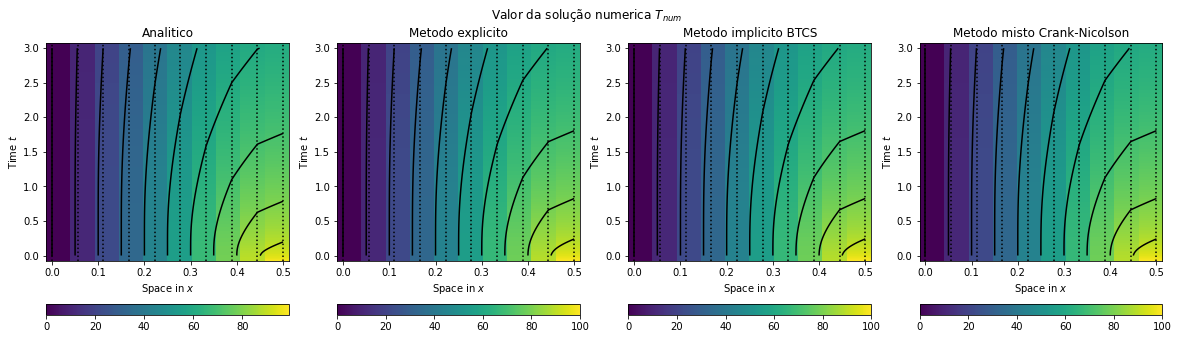

In [22]:
fig, axis = plt.subplots(1, 4, figsize=(20, 5))
plot_field(xmesh, tmesh, Tanalitic.T, axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[0].set_title("Analitico")
axis[0].set_xlabel("Space in $x$")
axis[0].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, Texplicit.T, axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[1].set_title("Metodo explicito")
axis[1].set_xlabel("Space in $x$")
axis[1].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, Timplicit.T, axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[2].set_title("Metodo implicito BTCS")
axis[2].set_xlabel("Space in $x$")
axis[2].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, Tcranknico.T, axis[3])
[axis[3].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[3].set_title("Metodo misto Crank-Nicolson")
axis[3].set_xlabel("Space in $x$")
axis[3].set_ylabel("Time $t$")
plt.suptitle(r"Valor da solução numerica $T_{num}$")

Text(0.5, 0.98, 'Erro da solução numerica $|T_{num}-T_{ana}|$')

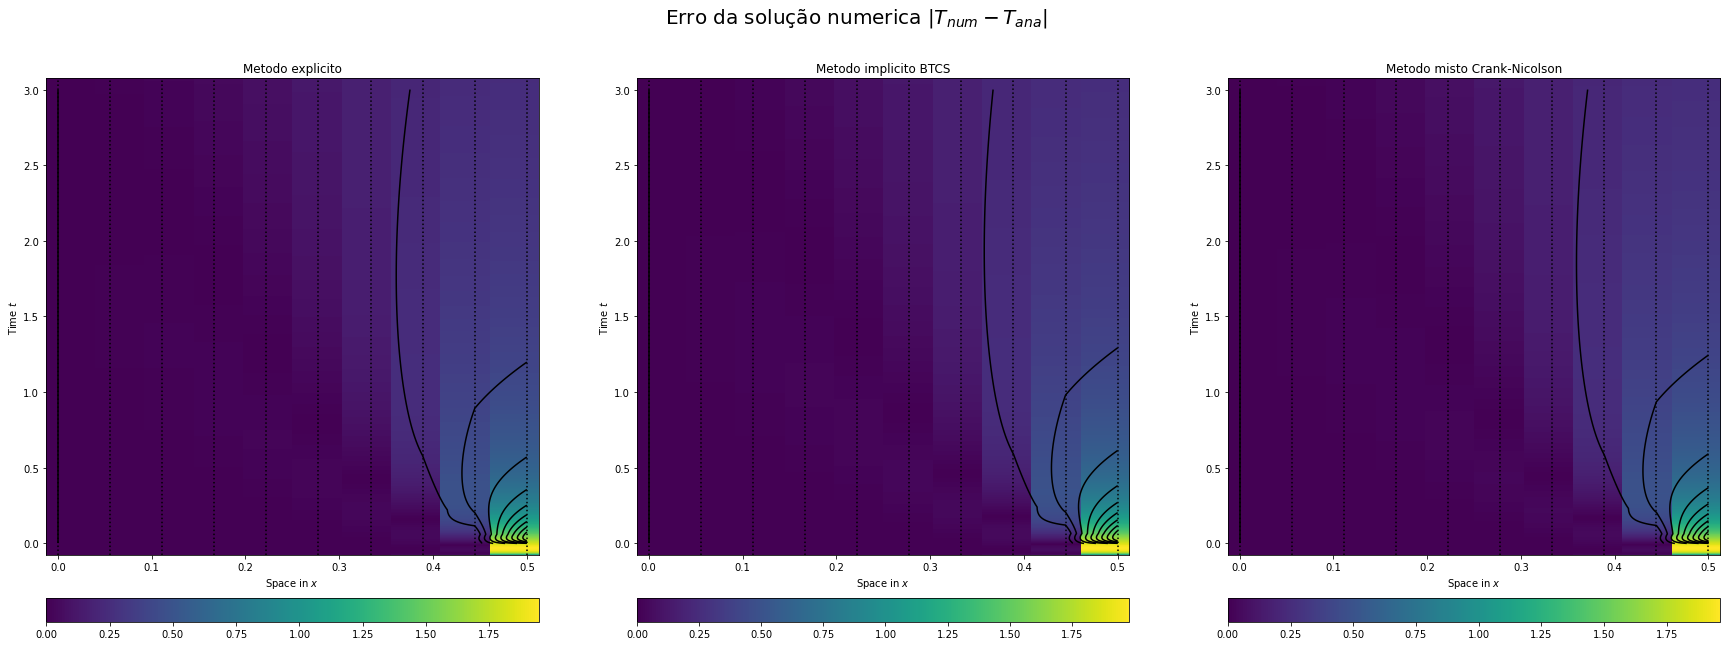

In [23]:
fig, axis = plt.subplots(1, 3, figsize=(30, 10))
plot_field(xmesh, tmesh, np.abs(Texplicit-Tanalitic).T, axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[0].set_title("Metodo explicito")
axis[0].set_xlabel("Space in $x$")
axis[0].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, np.abs(Timplicit-Tanalitic).T, axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[1].set_title("Metodo implicito BTCS")
axis[1].set_xlabel("Space in $x$")
axis[1].set_ylabel("Time $t$")
plot_field(xmesh, tmesh, np.abs(Tcranknico-Tanalitic).T, axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
axis[2].set_title("Metodo misto Crank-Nicolson")
axis[2].set_xlabel("Space in $x$")
axis[2].set_ylabel("Time $t$")
plt.suptitle(r"Erro da solução numerica $|T_{num}-T_{ana}|$",fontsize=20)

In [24]:
del xmesh
del tmesh
del Texplicit
del Timplicit
del Tcranknico
del Tanalitic
del Tboundary

### Exercício 16

> Resolva novamente o exercício 6, mas agora usando o método BTCS, e o Crank-Nicolson.
>
> Compare as 3 soluções numéricas entre si e com a solução analítica.
>
> > **Exercicio 6**
> > $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}$$
> > $$\Omega = \left[0,\ 1\right]\times\left[0,\ 1\right]\times\left[0,\ \infty\right)$$
> > $$\begin{align*} T(x, \ 0, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ T(x, \ 1, \ t) & = \sin \left(\pi x\right) \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)  \\ T(0, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ T(1, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\ T(x, \ y, \ 0) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ 1\right]\times\left[0, \ 1\right] \end{align*}$$
> > $$T_{analitic}(x, \ y,\ t\to \infty) = \dfrac{\sinh (\pi y) \sin (\pi x)}{\sinh \pi}$$

Inicialmente começamos com

In [25]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
tmin, tmax = 0, 7
nx, ny = 15, 15
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)

Como neste caso teriamos $n_t \times n_x \times n_y$ valores $T_{k,j,i}$, armazena-los todos ocupa muito espaço, de forma que iremos armazenar apenas o valor do passo $T_{k}$.

In [26]:
# Arrays to store results
Texplicit = np.empty((nx, ny), dtype="float64")
Timplicit = np.empty((nx, ny), dtype="float64")
Tcranknico = np.empty((nx, ny), dtype="float64")
Tboundary = np.empty((nx, ny), dtype="float64")
Tboundary.fill(np.nan)

# Initial conditions
Tinitial = np.zeros((nx, ny), dtype="float64")

# Boundary conditions
Tboundary[:, ny-1] = np.sin(np.pi*xmesh)
Tboundary[:, 0] = 0
Tboundary[0, :] = 0
Tboundary[nx-1, :] = 0
known_boundary = ~np.isnan(Tboundary)

# Analitic solution when t goest to infinity
Tanalitic = np.tensordot(np.sin(np.pi*xmesh), np.sinh(np.pi*ymesh), axes=0)/np.sinh(np.pi)

Novamente, da mesma forma acima com o parâmetro $\alpha$ e $\beta$, teremos:

$$ \left[\dfrac{\partial^2 T}{\partial x^2}\right]_{t_{k+\alpha}} = \dfrac{1-\alpha}{h_x^2} \left(T_{k,j,i-1}-2T_{k,j,i}+T_{k,j,i+1}\right) + \dfrac{\alpha}{h_x^2}\left(T_{k+1,j,i-1}-2T_{k+1,j,i}+T_{k+1,j,i+1}\right)$$
$$\left[\dfrac{\partial^2 T}{\partial y^2}\right]_{t_{k+\beta}} = \dfrac{1-\beta}{h_y^2} \left(T_{k,j-1,i}-2T_{k,j,i}+T_{k,j+1,i}\right) + \dfrac{\beta}{h_y^2}\left(T_{k+1,j-1,i}-2T_{k+1,j,i}+T_{k+1,j+1,i}\right)$$

Que reescrevemos como

$$\left[A_1\right] \begin{bmatrix}
T_{k+1,j,i-1} \\
T_{k+1,j-1,i} \\
T_{k+1,j,i} \\
T_{k+1,j+1,i} \\
T_{k+1,j,i+1} \\
\end{bmatrix} = \left[A_0\right] \begin{bmatrix}
T_{k,j,i-1} \\
T_{k,j-1,i} \\
T_{k,j,i} \\
T_{k,j+1,i} \\
T_{k,j,i+1} \\
\end{bmatrix}$$
$$\left[A_1\right] = \begin{bmatrix}
-\alpha b_x & -\beta b_y & 1 & -\beta b_y & -\alpha b_x
\end{bmatrix}$$
$$\left[A_0\right] = \begin{bmatrix}
(1-\alpha)b_x& (1-\beta)b_y & b_m & (1-\beta)b_y& (1-\alpha)b_x
\end{bmatrix}$$

$$
a_x = \dfrac{h_t}{h_x^2} \ \ \ \ \ \ \ \ \ \ \ \ a_y = \dfrac{h_t}{h_y^2} \ \ \ \ \ \ \ \ \ \ \ \ a_m = 1+2\alpha a_x + 2\beta a_y
$$
$$
b_x = \dfrac{a_x}{a_m} \ \ \ \ \ \ \ \ \ \ \ \ b_y = \dfrac{a_y}{a_m}  \ \ \ \ \ \ \ \ \ \ \ \ b_m = \dfrac{1}{a_m} - 2(1-\alpha)b_x - 2(1-\beta)b_y
$$

##### Método explícito 

No caso mais simples, o explicito em que $\alpha = \beta = 0$, teremos

$$\begin{bmatrix}
T_{k+1,j,i}
\end{bmatrix} = \begin{bmatrix}
a_x & a_y & \left(1 - 2a_x - 2a_y\right) & a_y & a_x
\end{bmatrix}
\begin{bmatrix}
T_{k,j,i-1} \\
T_{k,j-1,i} \\
T_{k,j,i} \\
T_{k,j+1,i} \\
T_{k,j,i+1} \\
\end{bmatrix}$$

In [27]:
nt = 15000
dt = (tmax-tmin)/(nt-1)
tmesh = np.linspace(tmin, tmax, nt)

# Explicit method
Texplicit[:] = Tinitial[:]
Texplicit[known_boundary] = Tboundary[known_boundary]
ax, ay = dt/dx**2, dt/dy**2
B = np.zeros((nx, ny), dtype="float64")
for k in tqdm(range(nt-1)):
    B[1:-1, 1:-1] = (1-2*(ax+ay))*Texplicit[1:-1, 1:-1]
    B[1:-1, 1:-1] += ax*Texplicit[:-2, 1:-1]
    B[1:-1, 1:-1] += ax*Texplicit[2:, 1:-1]
    B[1:-1, 1:-1] += ay*Texplicit[1:-1, :-2]
    B[1:-1, 1:-1] += ay*Texplicit[1:-1, 2:]
    Texplicit[1:-1, 1:-1] = B[1:-1, 1:-1]
    Texplicit[known_boundary] = Tboundary[known_boundary]

100%|██████████| 14999/14999 [00:01<00:00, 7679.00it/s]


Contudo, uma das características é que então resolveremos um sistema da forma:

$$
\sum_{r=0}^{n_x-1}\sum_{s=0}^{n_y-1} M_{j,i,s,r} \cdot T_{k+1,s,r} = \sum_{r=0}^{n_x-1}\sum_{s=0}^{n_y-1} K_{j,i,s,r} \cdot T_{k,s,r} \ \ \ \ \ \ \ \forall \begin{cases}i = 0, \cdots, n_x-1 \\ j=0, \cdots, n_y-1 \end{cases} 
$$

Que podemos montar um sistema linear equivalente 

$$
\sum_{j=0}^{n_x \cdot n_y - 1} M_{i,j}^{\star} \cdot T_{j}^{\star} = B_{i}^{\star} \ \ \ \ \ \ \ \ \ \ \forall i = 0, \cdots, \ n_x n_y - 1
$$

Em que $M^{\star}$ possui muitos nulos, o que torna métodos iterativos muito atraentes, e métodos diretos (como o utilizado pelo ```numpy```) podem ser bastantes custosos.
Assim, de agora em diante utilizaremos as matrizes esparsas do ```scipy``` e resolveremos o sistema (em métodos não-explícitos) utilizando o método ```SOR```.

E para o método implicito teremos $\alpha = \beta = 1$

$$\begin{bmatrix}
-b_x & -b_y & 1 & -b_y & -b_x
\end{bmatrix} \begin{bmatrix}
T_{k+1,j,i-1} \\
T_{k+1,j-1,i} \\
T_{k+1,j,i} \\
T_{k+1,j+1,i} \\
T_{k+1,j,i+1} \\
\end{bmatrix} = \begin{bmatrix}
T_{k,j,i}
\end{bmatrix}$$

In [28]:
nt = 400
dt = (tmax-tmin)/(nt-1)
tmesh = np.linspace(tmin, tmax, nt)

# Implicit method
Timplicit[:] = Tinitial[:]
Timplicit[known_boundary] = Tboundary[known_boundary]
ax, ay = dt/dx**2, dt/dy**2
am = 1+2*ax+2*ay
bx, by = ax/am, ay/am

A1 = np.zeros((nx, nx, ny, ny), dtype="float64")
for j in range(1, ny-1):
    for i in range(1, nx-1):
        A1[i, i, j, j] = 1
        A1[i, i-1, j, j] = -bx
        A1[i, i+1, j, j] = -bx
        A1[i, i, j, j-1] = -by
        A1[i, i, j, j+1] = -by
for i in range(nx):
    A1[i, i, 0, 0] = 1
    A1[i, i, ny-1, ny-1] = 1
for j in range(ny):
    A1[0, 0, j, j] = 1
    A1[nx-1, nx-1, j, j] = 1

for k in tqdm(range(nt-1)):
    Timplicit, _ = solve_system(A1, (1/am)*Timplicit, Tboundary)

100%|██████████| 399/399 [00:02<00:00, 161.87it/s]


In [29]:
nt = 400
dt = (tmax-tmin)/(nt-1)
tmesh = np.linspace(tmin, tmax, nt)

# Metodo misto
Tcranknico[:] = Tinitial[:]
Tcranknico[known_boundary] = Tboundary[known_boundary]
alpha, beta = 0.5, 0.5
ax, ay = dt/dx**2, dt/dy**2
am = 1+2*alpha*ax+2*beta*ay
bx, by = ax/am, ay/am
bm = (1/am) - 2*(1-alpha)*bx - 2*(1-beta)*by
a1x, a1y = -alpha*bx, -beta*by
a0x, a0y = (1-alpha)*bx, (1-beta)*by

A1 = np.zeros((nx, nx, ny, ny), dtype="float64")
for j in range(1, ny-1):
    for i in range(1, nx-1):
        A1[i, i, j, j] = 1
        A1[i, i-1, j, j] = a1x
        A1[i, i+1, j, j] = a1x
        A1[i, i, j, j-1] = a1y
        A1[i, i, j, j+1] = a1y
for i in range(nx):
    A1[i, i, 0, 0] = 1
    A1[i, i, ny-1, ny-1] = 1
for j in range(ny):
    A1[0, 0, j, j] = 1
    A1[nx-1, nx-1, j, j] = 1

B = np.zeros((nx, ny), dtype="float64")
for k in tqdm(range(nt-1)):
    B[1:-1, 1:-1] = bm*Tcranknico[1:-1, 1:-1]
    B[1:-1, 1:-1] += a0x*Tcranknico[0:-2, 1:-1]
    B[1:-1, 1:-1] += a0x*Tcranknico[2:, 1:-1]
    B[1:-1, 1:-1] += a0y*Tcranknico[1:-1, :-2]
    B[1:-1, 1:-1] += a0y*Tcranknico[1:-1, 2:]
    Tcranknico, _ = solve_system(A1, B, Tboundary)

100%|██████████| 399/399 [00:02<00:00, 146.66it/s]


Text(0.5, 0.98, 'Valores da solução$')

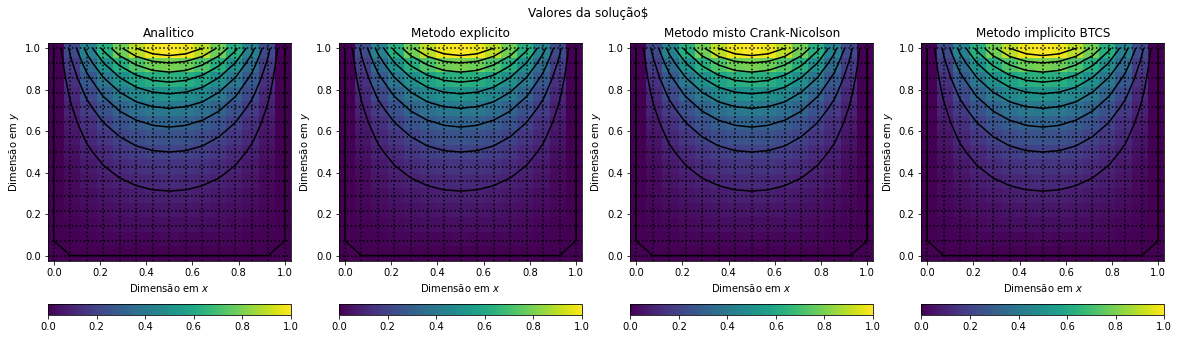

In [30]:
fig, axis = plt.subplots(1, 4, figsize=(20, 5))
plot_field(xmesh, ymesh, Texplicit, axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[0].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[0].set_title(r"Analitico")
axis[0].set_xlabel(r"Dimensão em $x$")
axis[0].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, Texplicit, axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[1].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[1].set_title(r"Metodo explicito")
axis[1].set_xlabel(r"Dimensão em $x$")
axis[1].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, Tcranknico, axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[2].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[2].set_title(r"Metodo misto Crank-Nicolson")
axis[2].set_xlabel(r"Dimensão em $x$")
axis[2].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, Timplicit, axis[3])
[axis[3].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[3].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[3].set_title(r"Metodo implicito BTCS")
axis[3].set_xlabel(r"Dimensão em $x$")
axis[3].set_ylabel(r"Dimensão em $y$")
plt.suptitle(r"Valores da solução$")

Text(0.5, 0.98, 'Erro das soluções numericas $|T_{num}-T_{ana}|$')

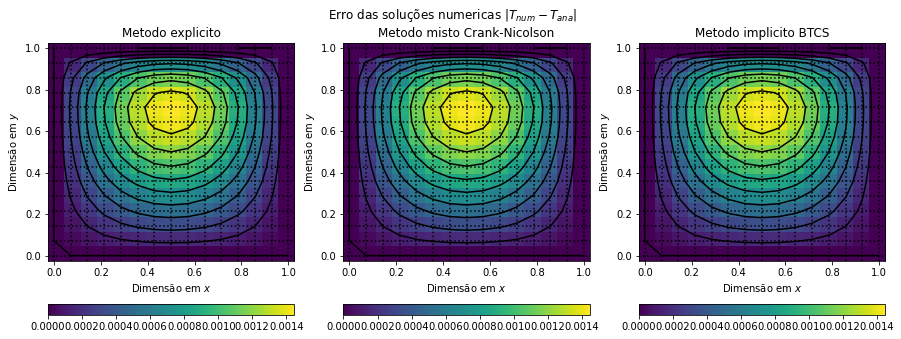

In [31]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, ymesh, np.abs(Texplicit-Tanalitic), axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[0].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[0].set_title(r"Metodo explicito")
axis[0].set_xlabel(r"Dimensão em $x$")
axis[0].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, np.abs(Tcranknico-Tanalitic), axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[1].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[1].set_title(r"Metodo misto Crank-Nicolson")
axis[1].set_xlabel(r"Dimensão em $x$")
axis[1].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, np.abs(Timplicit-Tanalitic), axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[2].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[2].set_title(r"Metodo implicito BTCS")
axis[2].set_xlabel(r"Dimensão em $x$")
axis[2].set_ylabel(r"Dimensão em $y$")
plt.suptitle(r"Erro das soluções numericas $|T_{num}-T_{ana}|$")

In [32]:
del xmesh
del ymesh
del tmesh
del Texplicit
del Timplicit
del Tcranknico
del Tanalitic
del Tboundary
del Tinitial
del A1
del B

### Exercício 17

> Resolva o exercício 7 usando os métodos BTCS e Crank-Nicolson.
> 
> Compare as soluções.
> > **Exercicio 7**
> > $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}$$
> > $$\Omega = \left[0,\ 0.5\right]\times\left[0,\ 1\right]\times\left[0,\ \infty\right)$$
> > $$\begin{align*} T(x, \ 0, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0,\ \infty\right) \\ T(x, \ 1, \ t) & = \sin \left(\pi x\right) \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0,\ \infty\right)  \\ T(0, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ \dfrac{\partial T}{\partial x}\left(\frac{1}{2}, \ y, \ t\right) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\ T(x, \ y, \ 0) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0, \ 1\right] \end{align*}$$
> > $$T_{analitic}(x, \ y,\ t\to \infty) = \dfrac{\sinh (\pi y) \sin (\pi x)}{\sinh \pi}$$

In [33]:
xmin, xmax = 0, 0.5
ymin, ymax = 0, 1
tmin, tmax = 0, 7
nx, ny = 15, 15
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)

# Arrays to store results
Texplicit = np.empty((nx, ny), dtype="float64")
Timplicit = np.empty((nx, ny), dtype="float64")
Tcranknico = np.empty((nx, ny), dtype="float64")
Tboundary = np.empty((nx, ny), dtype="float64")
Tboundary.fill(np.nan)

# Initial conditions
Tinitial = np.zeros((nx, ny), dtype="float64")

# Boundary conditions
Tboundary[:, ny-1] = np.sin(np.pi*xmesh)
Tboundary[:, 0] = 0
Tboundary[0, :] = 0
known_boundary = ~np.isnan(Tboundary)

# Analitic solution when t goest to infinity
Tanalitic = np.tensordot(np.sin(np.pi*xmesh), np.sinh(np.pi*ymesh), axes=0)/np.sinh(np.pi)

In [34]:
nt = 15000
dt = (tmax-tmin)/(nt-1)
tmesh = np.linspace(tmin, tmax, nt)

# Explicit method
Texplicit[:] = Tinitial[:]
Texplicit[known_boundary] = Tboundary[known_boundary]
ax, ay = dt/dx**2, dt/dy**2
B = np.zeros((nx, ny), dtype="float64")
for k in tqdm(range(nt-1)):
    B[1:, 1:-1] = (1-2*(ax+ay))*Texplicit[1:, 1:-1]
    B[1:, 1:-1] += ax*Texplicit[:-1, 1:-1]
    B[1:-1, 1:-1] += ax*Texplicit[2:, 1:-1]
    B[-1, 1:-1] += ax*Texplicit[-2, 1:-1]
    B[1:, 1:-1] += ay*Texplicit[1:, :-2]
    B[1:, 1:-1] += ay*Texplicit[1:, 2:]
    Texplicit[1:, 1:-1] = B[1:, 1:-1]
    Texplicit[known_boundary] = Tboundary[known_boundary]

100%|██████████| 14999/14999 [00:02<00:00, 7141.45it/s]


In [35]:
nt = 400
dt = (tmax-tmin)/(nt-1)
tmesh = np.linspace(tmin, tmax, nt)

# Implicit method
Timplicit[:] = Tinitial[:]
Timplicit[known_boundary] = Tboundary[known_boundary]
ax, ay = dt/dx**2, dt/dy**2
am = 1+2*ax+2*ay
bx, by = ax/am, ay/am

A1 = np.zeros((nx, nx, ny, ny), dtype="float64")
for j in range(1, ny-1):
    for i in range(1, nx-1):
        A1[i, i, j, j] = 1
        A1[i, i-1, j, j] = -bx
        A1[i, i+1, j, j] = -bx
        A1[i, i, j, j-1] = -by
        A1[i, i, j, j+1] = -by
    A1[nx-1, nx-1, j, j] = 1
    A1[nx-1, nx-2, j, j] = -2*bx
    A1[nx-1, nx-1, j, j-1] = -by
    A1[nx-1, nx-1, j, j+1] = -by
for i in range(nx):
    A1[i, i, 0, 0] = 1
    A1[i, i, ny-1, ny-1] = 1
for j in range(ny):
    A1[0, 0, j, j] = 1

for k in tqdm(range(nt-1)):
    Timplicit, _ = solve_system(A1, (1/am)*Timplicit, Tboundary)

100%|██████████| 399/399 [00:02<00:00, 158.14it/s]


In [36]:
nt = 400
dt = (tmax-tmin)/(nt-1)
tmesh = np.linspace(tmin, tmax, nt)

# Metodo misto
Tcranknico[:] = Tinitial[:]
Tcranknico[known_boundary] = Tboundary[known_boundary]
alpha, beta = 0.5, 0.5
ax, ay = dt/dx**2, dt/dy**2
am = 1+2*alpha*ax+2*beta*ay
bx, by = ax/am, ay/am
bm = (1/am) - 2*(1-alpha)*bx - 2*(1-beta)*by
a1x, a1y = -alpha*bx, -beta*by
a0x, a0y = (1-alpha)*bx, (1-beta)*by

A1 = np.zeros((nx, nx, ny, ny), dtype="float64")
for j in range(1, ny-1):
    for i in range(1, nx-1):
        A1[i, i, j, j] = 1
        A1[i, i-1, j, j] = a1x
        A1[i, i+1, j, j] = a1x
        A1[i, i, j, j-1] = a1y
        A1[i, i, j, j+1] = a1y
    A1[nx-1, nx-1, j, j] = 1
    A1[nx-1, nx-2, j, j] = 2*a1x
    A1[nx-1, nx-1, j, j-1] = a1y
    A1[nx-1, nx-1, j, j+1] = a1y

for i in range(nx):
    A1[i, i, 0, 0] = 1
    A1[i, i, ny-1, ny-1] = 1
for j in range(ny):
    A1[0, 0, j, j] = 1

B = np.zeros((nx, ny), dtype="float64")
for k in tqdm(range(nt-1)):
    B[1:, 1:-1] = bm*Tcranknico[1:, 1:-1]
    B[1:, 1:-1] += a0x*Tcranknico[:-1, 1:-1]
    B[1:-1, 1:-1] += a0x*Tcranknico[2:, 1:-1]
    B[-1, 1:-1] += a0x*Tcranknico[-2, 1:-1]
    B[1:, 1:-1] += a0y*Tcranknico[1:, :-2]
    B[1:, 1:-1] += a0y*Tcranknico[1:, 2:]
    Tcranknico, _ = solve_system(A1, B, Tboundary)

100%|██████████| 399/399 [00:02<00:00, 164.13it/s]


Text(0.5, 0.98, 'Valores da solução$')

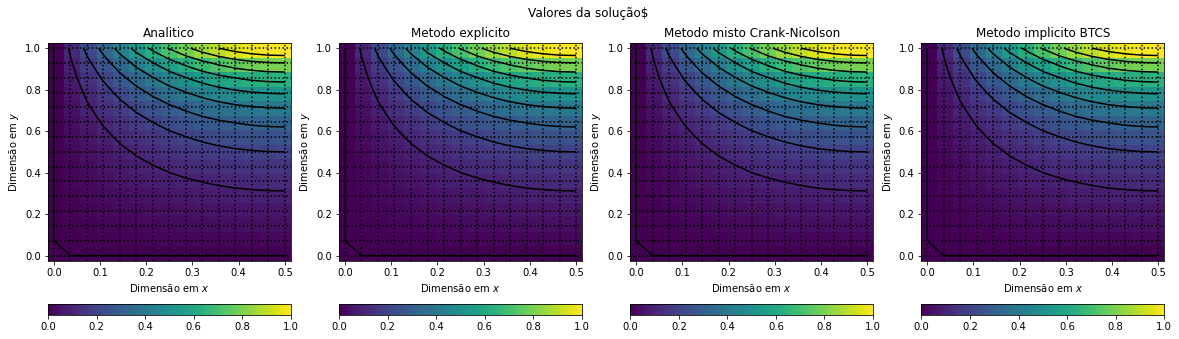

In [37]:
fig, axis = plt.subplots(1, 4, figsize=(20, 5))
plot_field(xmesh, ymesh, Texplicit, axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[0].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[0].set_title(r"Analitico")
axis[0].set_xlabel(r"Dimensão em $x$")
axis[0].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, Texplicit, axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[1].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[1].set_title(r"Metodo explicito")
axis[1].set_xlabel(r"Dimensão em $x$")
axis[1].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, Tcranknico, axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[2].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[2].set_title(r"Metodo misto Crank-Nicolson")
axis[2].set_xlabel(r"Dimensão em $x$")
axis[2].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, Timplicit, axis[3])
[axis[3].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[3].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[3].set_title(r"Metodo implicito BTCS")
axis[3].set_xlabel(r"Dimensão em $x$")
axis[3].set_ylabel(r"Dimensão em $y$")
plt.suptitle(r"Valores da solução$")

Text(0.5, 0.98, 'Erro das soluções numericas $|T_{num}-T_{ana}|$')

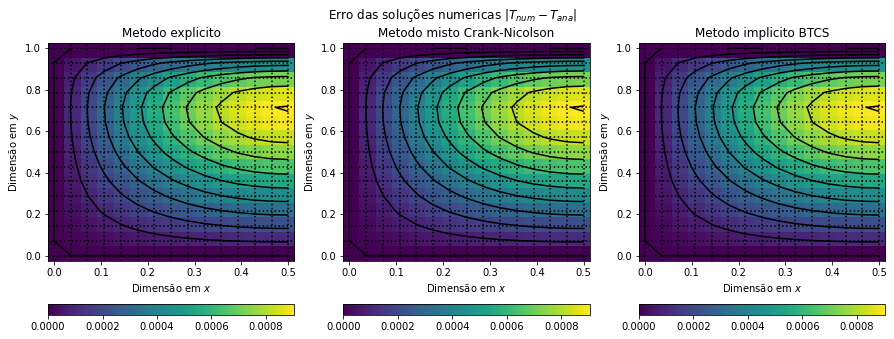

In [38]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, ymesh, np.abs(Texplicit-Tanalitic), axis[0])
[axis[0].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[0].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[0].set_title(r"Metodo explicito")
axis[0].set_xlabel(r"Dimensão em $x$")
axis[0].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, np.abs(Tcranknico-Tanalitic), axis[1])
[axis[1].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[1].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[1].set_title(r"Metodo misto Crank-Nicolson")
axis[1].set_xlabel(r"Dimensão em $x$")
axis[1].set_ylabel(r"Dimensão em $y$")
plot_field(xmesh, ymesh, np.abs(Timplicit-Tanalitic), axis[2])
[axis[2].axvline(x=xi, color="k", ls="dotted") for xi in xmesh]
[axis[2].axhline(y=yi, color="k", ls="dotted") for yi in ymesh]
axis[2].set_title(r"Metodo implicito BTCS")
axis[2].set_xlabel(r"Dimensão em $x$")
axis[2].set_ylabel(r"Dimensão em $y$")
plt.suptitle(r"Erro das soluções numericas $|T_{num}-T_{ana}|$")